In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import quad
from scipy import special
from scipy import optimize


In [3]:
# Data from .35-3.55 q [fm-1] 48Ca
# H. De VRIES et. al.
hc = 197.327053
Z   = 20
rms = 3.451 #3.451(9)
R_max = 8 
coeff = np.array([4.4782e-2,5.9523e-2,-7.4148e-3,-2.9466e-2,-2.835e-4,1.0829e-2,3.0465e-3, -1.0237e-3, -1.783e-4, 5.5391e-5, -2.2644e-5, 8.2671e-6, -2.7343e-6, 8.2461e-7, -2.278e-7])

194.72883566798117
11.910557082310307


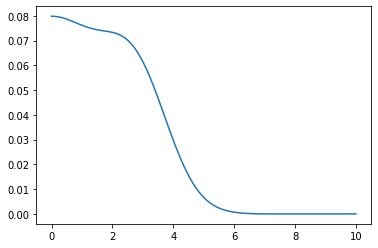

In [144]:
def den(r):
    density = 0.0
    index = 1
    for x in coeff:
        density += x * special.spherical_jn(0,index * np.pi * r/R_max)
        index = index + 1
    if r < R_max:
        return density
    else:
        return 0.0

den_vec = np.vectorize(den)
x = np.linspace(0.0,10.0,100)    
y = den_vec(x)
#y = special.j0(x)
plt.plot(x,y, '-' )


#What is r**4 from density
r4 = quad( lambda r: (4 * np.pi)/Z * den(r) * r**6, 0.0 , R_max)[0]
print(r4)
r2 = quad( lambda r: (4 * np.pi)/Z * den(r) * r**4, 0.0 , R_max)[0]
print(r2)

In [5]:
#Calculate the rms from what I think the paper is doing
rms_m, err = quad(lambda r: (4 * np.pi)/Z * den(r) * r**4, 0.0, R_max)

In [6]:
#check rms is same as cited
np.sqrt(rms_m)-rms

0.00016749554557371482

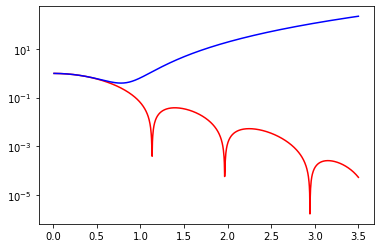

In [156]:
#Calculate the form factor from the density distribution
def form(q):
    return quad(lambda r:(4 * np.pi)/Z * den(r)  * r * np.sin(q * r)/q, 0., R_max )[0]


def form_taylor(q):
    return 1 - q**2 * rms**2/6 + 197*q**4/120

form_vec = np.vectorize(form)
formt_vec = np.vectorize(form_taylor)

x1 = np.linspace(.01,3.5,1000)    
y1 = form_vec(x1)
y2 = formt_vec(x1)
plt.plot(x1,np.abs(y1), '-r' )
plt.yscale('log')
#plt.ylim(1e-6,1)
plt.plot(x1,y2, '-b')

In [172]:
#Just curious what the density profile will be from the expansion F(q) = 1 - q**2 * <r**2>/6

def den_taylor(r):
    if r < R_max:
        return quad(lambda q:  form(q) * q * np.sin(q * r)/r, 0, 20.5)[0]
    else :
        return 0.0
dent_vec = np.vectorize(den_taylor)
x3 = np.linspace(0.01,R_max,100)
y3 = dent_vec(x3)
plt.plot(x3,y3, '-r' )
plt.plot(x,y, 'b' )




KeyboardInterrupt: 

11.89057683262039
190.09926192912556


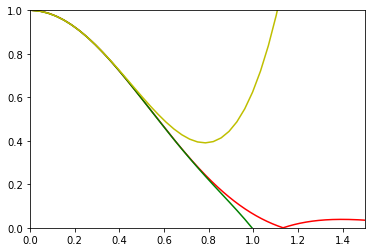

In [183]:
#Fit Form factor for moments
def fitfunc(x,a2,a4,a6):
    return 1 - x**2 * a2/6.0 + x**4 * a4/120.0 - x**6 * a6/5040.0
#fitfunc = lambda p, x: 1 - x**2 * p[0]**2/6.0 + x**4 * p[1]/120.0
#fitfunc = lambda p, x: 1 - x**2 * p[0]**2/6.0 + x**4 * p[1]/120.0
#fitfunc = lambda p, x: 1 - x**2 * p[0]**2/6.0 
errfunc = lambda p, x, y: fitfunc(p,x) - y
p0 =[11.9, 194., 1000]
#sub range
xsub = x1[x1 < .5]
ysub = y1[x1 < .5]
bnds = ((100.,0.0), (1000.,0.0))
popt, pcov = optimize.curve_fit(fitfunc, xsub, ysub, (11.,190.,1000), bounds = (0.,[20.,1000,10000]) )
time = np.linspace(x1.min(), x1.max(), 100)
p1 = [11.91,  194, 0]
plt.plot(x1,np.abs(y1), "r-", time, fitfunc(time,popt[0],popt[1], popt[2]), "g-") # Plot of the data and the fit
plt.plot(time, fitfunc(time,p1[0],p1[1],p1[2]), "y-") # Plot of the data and the fit
#plt.plot(x1,np.abs(y1), '-b')
#plt.yscale('log')
plt.ylim(0,1.)
plt.xlim(0,1.5)
print(popt[0])
print(popt[1])